# Deep Learning Assignment - 1

## Name: Sanyam Kaul
## Roll Number: CS23MTECH14011

---

## Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# method to generate linearly separable dataset
def generate_clustered_dataset(size, separability):
    np.random.seed(42)

    # Mean of the first cluster
    mean1 = np.array([0, 0])

    # Mean of the second cluster
    mean2 = np.array([separability, separability])

    # Covariance matrix for both clusters
    covariance_matrix = np.array([[1, 0], [0, 1]])

    # Generate points for each cluster
    cluster1 = np.random.multivariate_normal(mean1, covariance_matrix, size // 2)
    cluster2 = np.random.multivariate_normal(mean2, covariance_matrix, size // 2)

    # Combine the points and assign labels
    X = np.vstack((cluster1, cluster2))
    y = np.hstack((np.ones(size // 2), -np.ones(size // 2)))

    return X, y

In [3]:
# Perceptron training algorithm
def perceptron_train(X, y, weights, bias, sep_val, learning_rate=0.1, max_iterations=1000):
    for iteration in range(max_iterations):
        for i in range(num_samples):
            prediction = np.dot(X[i], weights) + bias
            if prediction * y[i] <= 0:
                avg_k_list[sep_val] = avg_k_list[sep_val] + 1
                weights += learning_rate * y[i] * X[i]
                bias += learning_rate * y[i]

        # Check for perfect classification
        if np.all(np.sign(np.dot(X, weights) + bias) == y):
            return weights, bias

    return weights, bias

In [4]:
# method to plot the dataset with decision boundary
def plot_decision_boundary(X, y, weights, bias, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')

    x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_vals = (-weights[0] * x_vals - bias) / weights[1]
    plt.plot(x_vals, y_vals, '-r', label='Decision Boundary')

    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.xlim(-5, 10)
    plt.ylim(-5, 15)
    plt.legend()
    plt.show()

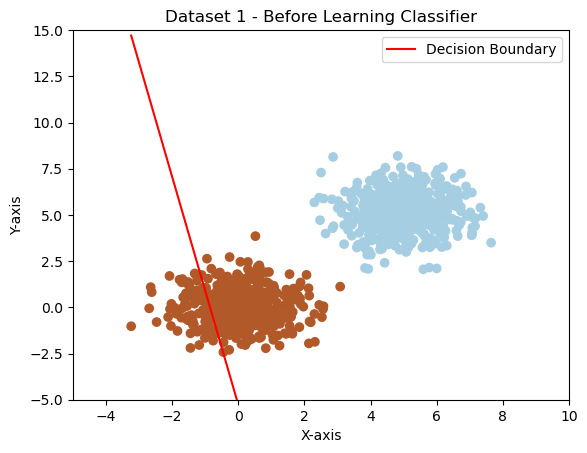

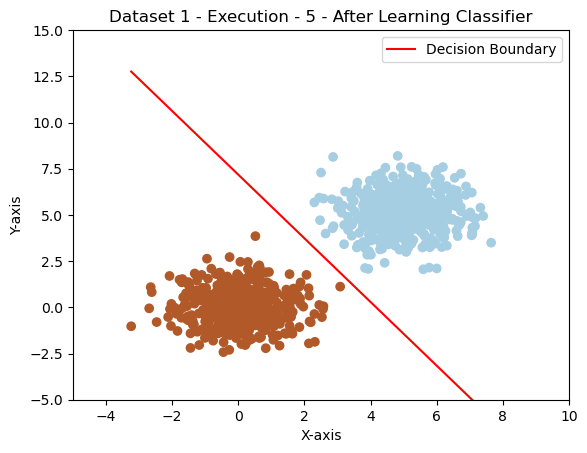

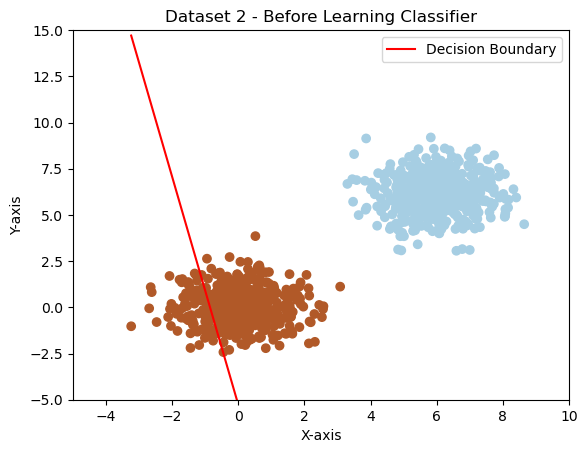

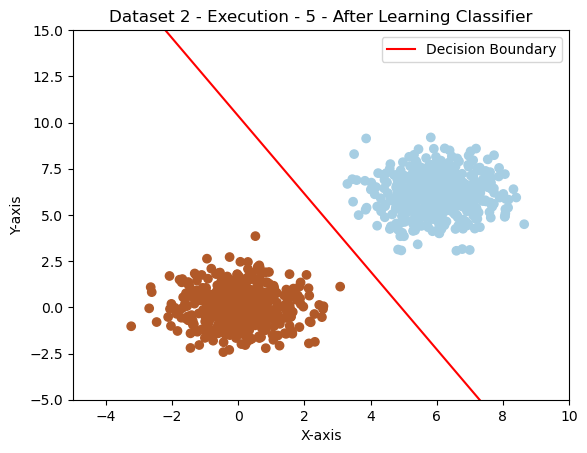

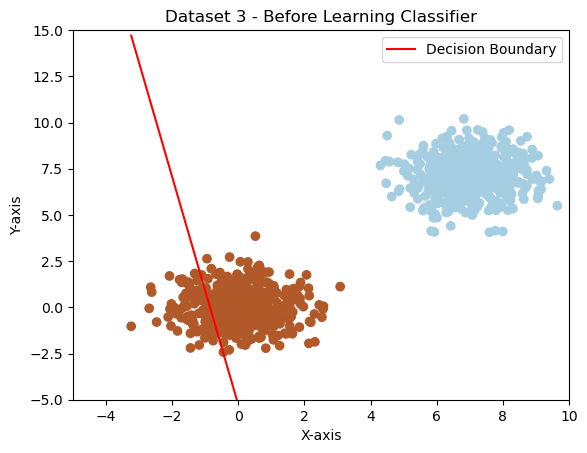

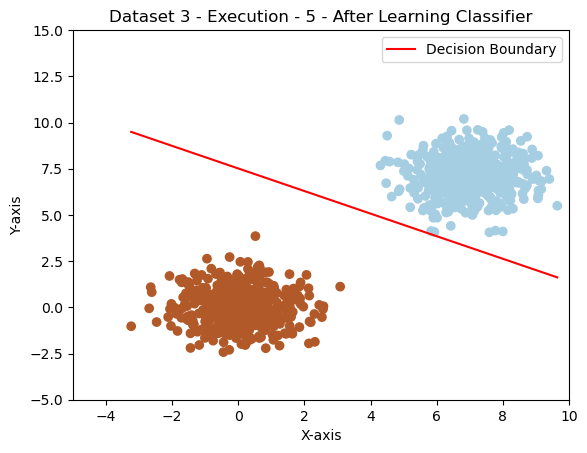

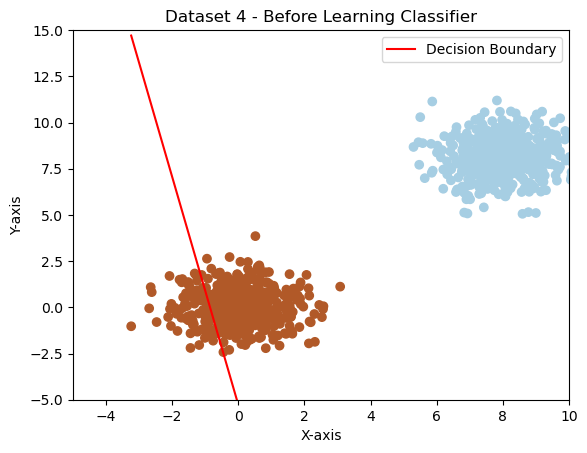

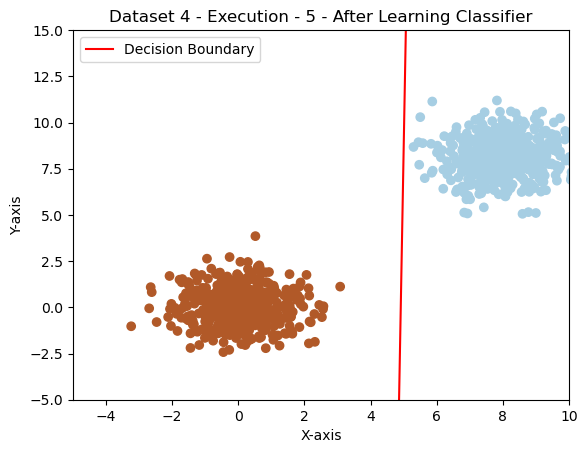

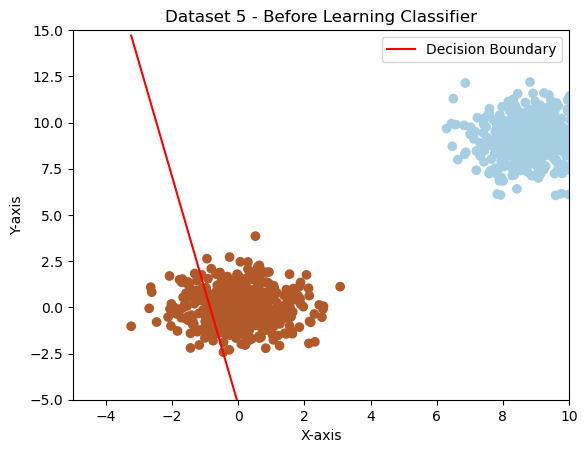

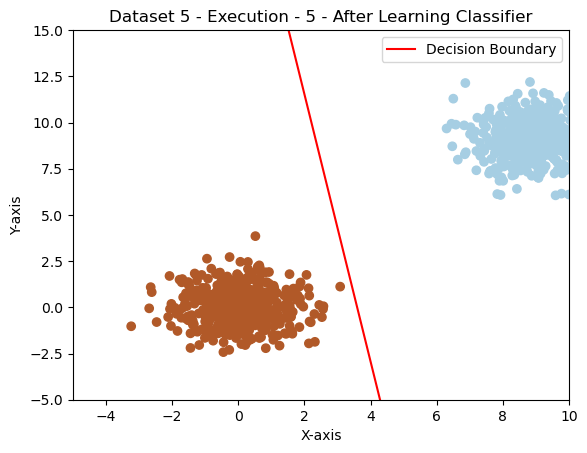

 Degree of Separatibility: [5.0, 6.0, 7.0, 8.0, 9.0]
 Number of Iterations: [32.0, 20.4, 23.0, 20.0, 8.2]


In [5]:
# Main code which calls training algorithm and calculates K values
separability_values = [5.0, 6.0, 7.0, 8.0, 9.0]
avg_k_list = [0,0,0,0,0]

for i, separability in enumerate(separability_values):
    X, y = generate_clustered_dataset(1000, separability)
    num_samples, num_features = X.shape
    weights0 = np.random.rand(num_features)
    bias0 = np.random.rand()
    # Plot the dataset before learning the classifier
    plot_decision_boundary(X, y, weights0, bias0, f'Dataset {i+1} - Before Learning Classifier')
    
    # Train the perceptron on the dataset 5 times and take average iterations 
    for perceptron_train_itr in range(5):
        weights, bias = perceptron_train(X, y, weights0, bias0, i)
        # Plot the dataset after learning the classifier
        if perceptron_train_itr == 4:
            plot_decision_boundary(X, y, weights, bias, f'Dataset {i+1} - Execution - {perceptron_train_itr + 1} - After Learning Classifier')

for itr in range(5):
    avg_k_list[itr] = avg_k_list[itr] / 5

print(f' Degree of Separatibility: {separability_values}')
print(f' Number of Iterations: {avg_k_list}')

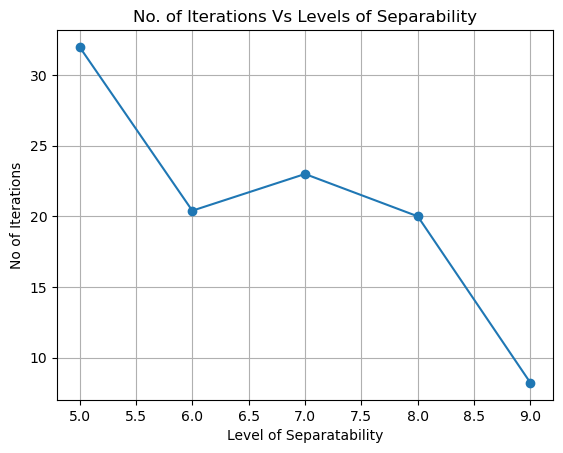

In [6]:
x_values = separability_values
y_values = avg_k_list
# Plotting the line graph
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Level of Separatability')
plt.ylabel('No of Iterations')
plt.title('No. of Iterations Vs Levels of Separability')

# Adding grid
plt.grid(True)
# Show the plot
plt.show()

In [7]:
#command to clear memory so that the previously defined variables do not conflict in the next peice of code
%reset -f

---

## Q2

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# method to generate linearly separable dataset
def generate_clustered_dataset(size, separability):
    np.random.seed(42)

    # Mean of the first cluster
    mean1 = np.array([0, 0])

    # Mean of the second cluster
    mean2 = np.array([separability, separability])

    # Covariance matrix for both clusters
    covariance_matrix = np.array([[1, 0], [0, 1]])

    # Generate points for each cluster
    cluster1 = np.random.multivariate_normal(mean1, covariance_matrix, size // 2)
    cluster2 = np.random.multivariate_normal(mean2, covariance_matrix, size // 2)

    # Combine the points and assign labels
    X = np.vstack((cluster1, cluster2)) 
    y = np.hstack((np.ones(size // 2), np.zeros(size // 2)))
    return X, y

In [10]:
# method to plot data-set without the classifier
def plot_clustered_dataset(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

In [11]:
# method to plot the data-set with the classifying boundary
def plot_decision_boundary(X, y, weights, bias, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')

    x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_vals = (-weights[0] * x_vals - bias) / weights[1]
    plt.plot(x_vals, y_vals, '-r', label='Decision Boundary')

    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.xlim(-5, 10)
    plt.ylim(-5, 15)
    plt.legend()
    plt.show()

In [12]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [13]:
def binary_cross_entropy_loss(y_true, y_pred):
    loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / 1000
    return loss

In [14]:
# method returns the calculated value of the gradient of the binary cross entropy loss wrt bias
def gradient_cross_entropy_loss_wrt_bias(y_true, y_pred):
    return np.sum(y_pred - y_true) / 1000

In [15]:
# method returns the calculated value of the gradient of the binary cross entropy loss wrt weights
def gradient_cross_entropy_loss_wrt_w(y_true, y_pred, x):
    return np.sum(np.dot(x.T, (y_pred - y_true))) / 1000

In [16]:
loss_vals = []

In [17]:
# Gradient Descent algorithm with cross-entropy loss for binary classification
def gradient_descent(X, y, weights, bias, learning_rate=0.01, max_iterations=5000):
    updates = 0;
    for iteration in range(0, max_iterations):
        logits = np.dot(X, weights) + bias
        predictions = sigmoid(logits)
        loss = binary_cross_entropy_loss(y, predictions)
        
        if iteration % 100 == 0:
            print("Loss: %4.2f"%loss, f"| After Epochs: {iteration}")
            loss_vals.append(loss)
            
        # Update weights and bias
        weights -= learning_rate * gradient_cross_entropy_loss_wrt_w(y, predictions, X)
        bias -= learning_rate * gradient_cross_entropy_loss_wrt_bias(y, predictions)

    return weights, bias

(1000, 2)
(1000, 1)


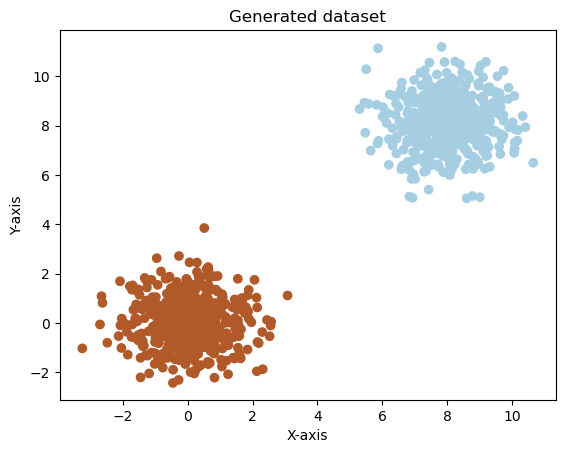

In [18]:
X, y = generate_clustered_dataset(1000, 8.0)
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

plot_clustered_dataset(X, y, "Generated dataset")

Initial Weights : [[0.]
 [1.]]
initial bias: 0


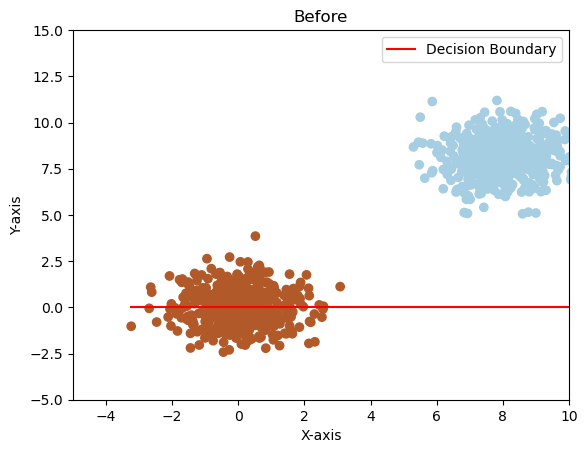

Loss: 4.43 | After Epochs: 0
Loss: 0.34 | After Epochs: 100
Loss: 0.30 | After Epochs: 200
Loss: 0.26 | After Epochs: 300
Loss: 0.23 | After Epochs: 400
Loss: 0.21 | After Epochs: 500
Loss: 0.19 | After Epochs: 600
Loss: 0.17 | After Epochs: 700
Loss: 0.16 | After Epochs: 800
Loss: 0.14 | After Epochs: 900
Loss: 0.13 | After Epochs: 1000
Loss: 0.12 | After Epochs: 1100
Loss: 0.11 | After Epochs: 1200
Loss: 0.11 | After Epochs: 1300
Loss: 0.10 | After Epochs: 1400
Loss: 0.09 | After Epochs: 1500
Loss: 0.09 | After Epochs: 1600
Loss: 0.08 | After Epochs: 1700
Loss: 0.08 | After Epochs: 1800
Loss: 0.08 | After Epochs: 1900
Loss: 0.07 | After Epochs: 2000
Loss: 0.07 | After Epochs: 2100
Loss: 0.07 | After Epochs: 2200
Loss: 0.06 | After Epochs: 2300
Loss: 0.06 | After Epochs: 2400
Loss: 0.06 | After Epochs: 2500
Loss: 0.06 | After Epochs: 2600
Loss: 0.05 | After Epochs: 2700
Loss: 0.05 | After Epochs: 2800
Loss: 0.05 | After Epochs: 2900
Loss: 0.05 | After Epochs: 3000
Loss: 0.05 | After E

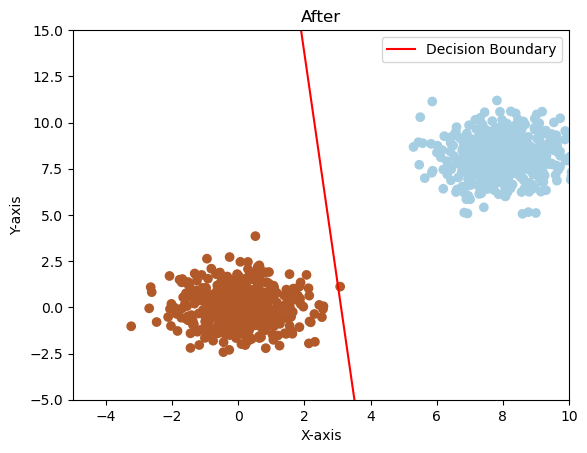

In [19]:
num_samples, num_features = X.shape
weights = np.ones((num_features,1))
weights[0] = 0
bias = 0
print(f'Initial Weights : {weights}')
print(f'initial bias: {bias}')
plot_decision_boundary(X, y, weights, bias, "Before")

# Apply Gradient Descent with cross-entropy loss to learn the model
weights, bias = gradient_descent(X, y, weights, bias)

print(f'Final Weights: {weights}')
print(f'Final Bias: {bias}')

plot_decision_boundary(X, y, weights, bias, "After")

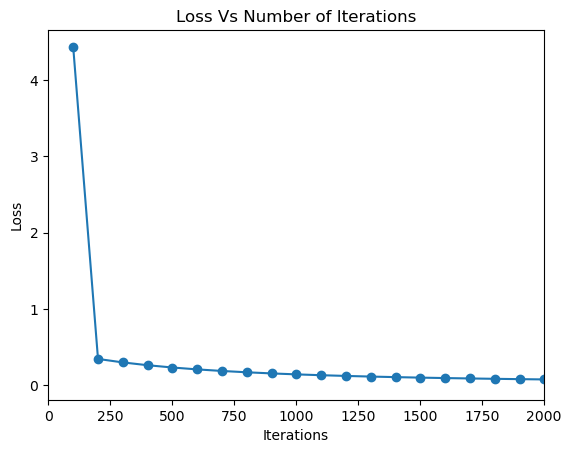

In [20]:
x_values = []
for i in range(50):
    x_values.append((i + 1)*100 + 1)
y_values = loss_vals

# Plotting the line graph
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Vs Number of Iterations')

plt.xlim(0, 2000)
# Show the plot
plt.show()

In [21]:
%reset -f

---

## Q3

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def generate_nonlinear_dataset(size):
    np.random.seed(42)
    theta = 2 * np.pi * np.random.rand(size)
    inner_circle = np.array([np.cos(theta), np.sin(theta)]).T
    outer_circle = 2 * inner_circle

    X = np.vstack([inner_circle, outer_circle])
    y = np.hstack([np.zeros(size), np.ones(size)])

    return X, y

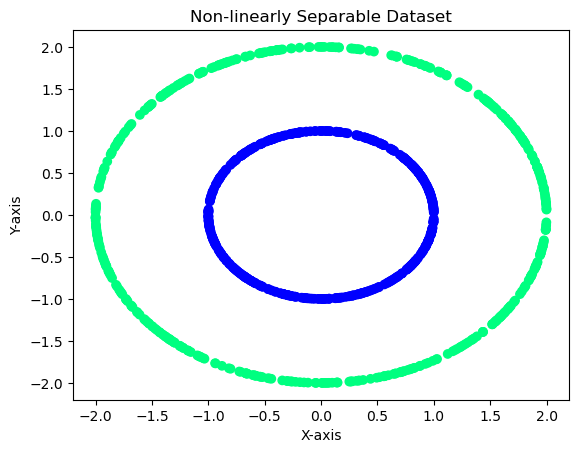

In [24]:
# Generate non-linearly separable dataset
num_samples = 500
X, y = generate_nonlinear_dataset(num_samples)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.winter)
plt.title('Non-linearly Separable Dataset')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [25]:
def sigmoid(x):
        return (1 / (1 + np.exp(-x)))

In [26]:
def der_sigmoid(x):
    return (x * (1 - x))

In [27]:
def cross_entropy_loss(m, y, a2):
    loss = -(1/m) * np.sum(y * np.log(a2) + (1 - y) * np.log(1 - a2))
    return loss

In [28]:
#Method to calculate the activations by using sigmoid function
def cal_activations(X, w1, w2, b1, b2):
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)
    return (a1,a2)

In [29]:
#method to calculate the gradients
def cal_gradients(m, y, a2, a1, W2):
    dz2 = a2 - y
    dW2 = (1/m) * np.dot(a1.T, dz2)
    db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
    dz1 = np.dot(dz2, W2.T) * der_sigmoid(a1)
    dW1 = (1/m) * np.dot(X.T, dz1)
    db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)
    return (dW2,db2,dW1,db1)

In [30]:
# method to update the weights during back-propagation
def update_weights(dW1, db1, dW2, db2, W1, b1, W2, b2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return (W1,b1,W2,b2)

In [31]:
class MLP:
    def __init__(self, input_layer, hidden_layer, output_layer):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_layer, hidden_layer)
        self.b1 = np.zeros((1, hidden_layer))
        self.W2 = np.random.randn(hidden_layer, output_layer)
        self.b2 = np.zeros((1, output_layer))
        
        print(f'Weights from Input layer to Hidden Layer: {self.W1.shape}')
        print(f'Bias for Hiden Layer: {self.b1.shape}')
        print(f'Weights from Hidden layer to Outpur Layer: {self.W2.shape}')
        print(f'Bias for Output Layer: {self.b2.shape}')
    
    # FORWARD-PASS
    def forward(self, X):
        # Forward pass
        (self.a1, self.a2) = cal_activations(X, self.W1, self.W2, self.b1, self.b2)
        return self.a2
    
    #BACK-PROPAGATION
    def backward(self, X, y, learning_rate):
        # Backward pass
        m = X.shape[0]
        # Calculate loss
        loss = cross_entropy_loss(m,y, self.a2)
        # Compute gradients 
        (dW2,db2,dW1,db1) = cal_gradients(m, y, self.a2, self.a1, self.W2)        
        # Update weights and biases
        (self.W1,self.b1,self.W2,self.b2) = update_weights(dW1, db1, dW2, db2, self.W1, self.b1, self.W2, self.b2, learning_rate)
        return loss

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            predictions = self.forward(X)
            
            # Backward pass and optimization
            loss = self.backward(X, y, learning_rate)
            
            #Print the loss every 200 epochs
            if epoch % 200 == 0:
                print("Loss: %4.2f"%loss, f"| After Epochs: {epoch}")
                
        print("Training complete!")

In [32]:
# method to classify the data-points into 2 classes by passing the number of epochs as parameter
def classify(epochs):
    # Create an instance of MLP
    input_size = 2
    hidden_size = 8
    output_size = 1

    mlp = MLP(input_size, hidden_size, output_size)
    # Train the MLP
    learning_rate = 0.01
    mlp.train(X, y.reshape(-1, 1), epochs, learning_rate)

    # Make predictions on the training data
    predictions = mlp.forward(X)

    # Threshold the predictions (0.5) for binary classification
    binary_predictions = (predictions >= 0.5).astype(int)

    # Plot the decision boundary
    plt.scatter(X[:, 0], X[:, 1], c=binary_predictions.flatten(), cmap=plt.cm.winter)
    plt.title('MLP Decision Boundary')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

Weights from Input layer to Hidden Layer: (2, 8)
Bias for Hiden Layer: (1, 8)
Weights from Hidden layer to Outpur Layer: (8, 1)
Bias for Output Layer: (1, 1)
Loss: 0.71 | After Epochs: 0
Loss: 0.70 | After Epochs: 200
Loss: 0.70 | After Epochs: 400
Loss: 0.70 | After Epochs: 600
Loss: 0.69 | After Epochs: 800
Loss: 0.69 | After Epochs: 1000
Training complete!


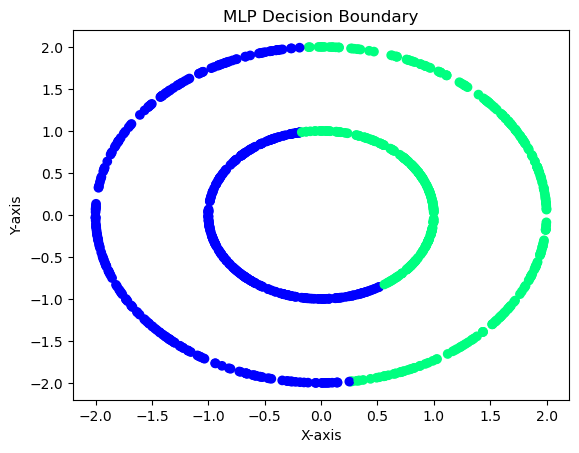

In [33]:
#Using 1,001 epochs to learn the classifier. We can see that the error after 1000 epochs is 0.69 and the classifier is not properly learnt
classify(1001)

Weights from Input layer to Hidden Layer: (2, 8)
Bias for Hiden Layer: (1, 8)
Weights from Hidden layer to Outpur Layer: (8, 1)
Bias for Output Layer: (1, 1)
Loss: 1.16 | After Epochs: 0
Loss: 0.77 | After Epochs: 200
Loss: 0.72 | After Epochs: 400
Loss: 0.70 | After Epochs: 600
Loss: 0.69 | After Epochs: 800
Loss: 0.69 | After Epochs: 1000
Loss: 0.68 | After Epochs: 1200
Loss: 0.67 | After Epochs: 1400
Loss: 0.67 | After Epochs: 1600
Loss: 0.66 | After Epochs: 1800
Loss: 0.66 | After Epochs: 2000
Loss: 0.65 | After Epochs: 2200
Loss: 0.65 | After Epochs: 2400
Loss: 0.64 | After Epochs: 2600
Loss: 0.64 | After Epochs: 2800
Loss: 0.63 | After Epochs: 3000
Loss: 0.63 | After Epochs: 3200
Loss: 0.62 | After Epochs: 3400
Loss: 0.62 | After Epochs: 3600
Loss: 0.61 | After Epochs: 3800
Loss: 0.60 | After Epochs: 4000
Loss: 0.60 | After Epochs: 4200
Loss: 0.59 | After Epochs: 4400
Loss: 0.59 | After Epochs: 4600
Loss: 0.58 | After Epochs: 4800
Loss: 0.57 | After Epochs: 5000
Loss: 0.57 | Afte

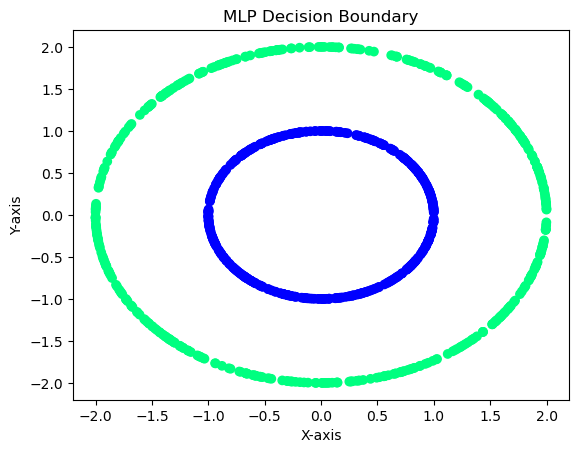

In [34]:
#Using 10,0001 epochs to learn the classifier. During some executions perfect classification occured at 16k epochs
classify(10001)